In [10]:
#
#
# USANDO O SVM NA BASE DE DADOS DO DIABETES
# ESCOLHENDO VARIOS Kernels PARA A BASE
#

import pandas
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
plt.rcParams['figure.figsize'] = [16, 10]

#definindo os nomes de cada coluna
names = ['num-pregnant', 'glucose', 'diastolic', 'triceps-skin', 'insulin', 'body-mass', 'diabetes-pedigree', 'age', 'class']

#Fazendo o carregamento dos dados diretamente do UCI Machine Learning
dataset = pandas.read_csv("pima-indians-diabetes.csv", names=names)

print("Primeiros dados")
print(dataset.head())




Primeiros dados
   num-pregnant  glucose  diastolic  triceps-skin  insulin  body-mass  \
0             6      148         72            35        0       33.6   
1             1       85         66            29        0       26.6   
2             8      183         64             0        0       23.3   
3             1       89         66            23       94       28.1   
4             0      137         40            35      168       43.1   

   diabetes-pedigree  age  class  
0              0.627   50      1  
1              0.351   31      0  
2              0.672   32      1  
3              0.167   21      0  
4              2.288   33      1  


In [11]:
#divisao de dados atributos e classe
X = dataset.values[:, 0:len(dataset.values[0])-1] #caracteristicas
Y = dataset.values[:, len(dataset.values[0])-1] #classe

#usando o metodo para fazer uma unica divisao dos dados
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.25, random_state = 10)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.25, random_state = 10)

clf = SVC()

clf.fit(X_train, y_train)

kernels_range = ['poly', 'rbf', 'sigmoid']
#c_range =[0.1,1,2,4,5,10,15,20,30,50,100,200,500,1000]
#gamma = [1,3,4,5,7,10,15,20,25,30,40,50,100,200,500,1000]
c_range =[0.1]
gamma = [1]
k_scores_train = []
k_scores_valid = []
k_scores_cross = []



In [12]:
# use iteration to caclulator different kernels in models, then return the average accuracy based on the cross validation
for j in c_range:
  for k in gamma:
    svc = SVC(C=j, gamma=k, random_state=10, kernel=kernels_range[2])
    scores = cross_val_score(svc, X_train, y_train, cv=5, scoring='accuracy')
    k_scores_cross.append(scores.mean())
    svc.fit(X_train, y_train)
    k_scores_train.append(svc.score(X_train, y_train))
    k_scores_valid.append(svc.score(X_valid, y_valid))



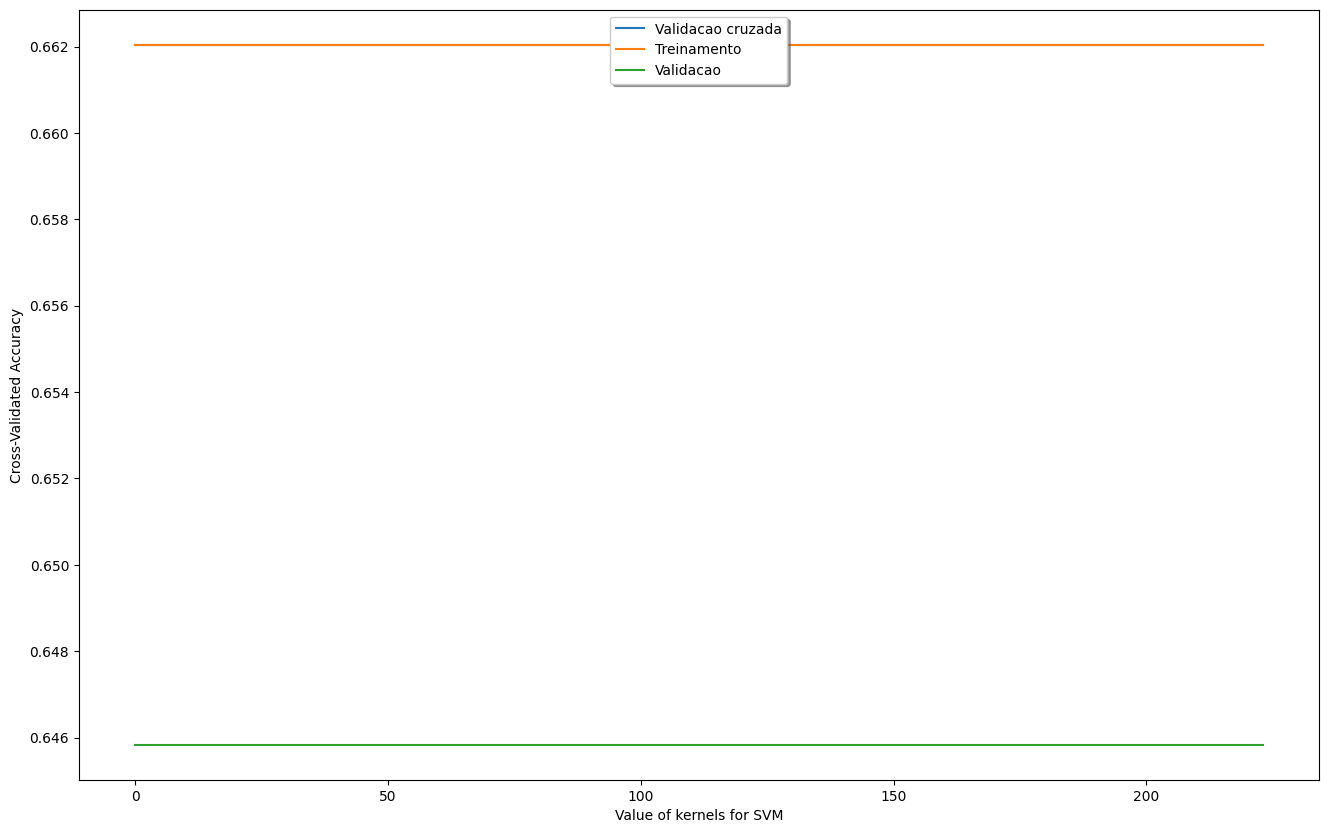

Acuracia de treinamento clf: 0.782
Acuracia de validacao clf: 0.771
Acuracia de teste clf: 0.698


In [13]:
# plot to see clearly
plt.plot(list(range(0,len(k_scores_cross))), k_scores_cross)
plt.plot(list(range(0,len(k_scores_train))), k_scores_train)
plt.plot(list(range(0,len(k_scores_valid))), k_scores_valid)
plt.legend(('Validacao cruzada', 'Treinamento', 'Validacao'),
           loc='upper center', shadow=True)
plt.xlabel('Value of kernels for SVM')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

print("Acuracia de treinamento clf: %0.3f" %  clf.score(X_train, y_train))
print("Acuracia de validacao clf: %0.3f" %  clf.score(X_valid, y_valid))
print("Acuracia de teste clf: %0.3f" %  clf.score(X_test, y_test))